# Data Cleaning with Python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Placements.csv')

In [5]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,X,Y
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,1000.0,700.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,NaN,NaN
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,NaN,NaN


# lets check the columns and their data types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
X                 1 non-null float64
Y                 1 non-null float64
dtypes: float64(8), int64(1), object(8)
memory usage: 28.7+ KB


In [ ]:
# Heatmap below shows the area where the null value exists. We can see Column Salary, X & Y have the null values.

<Figure size 1152x576 with 0 Axes>

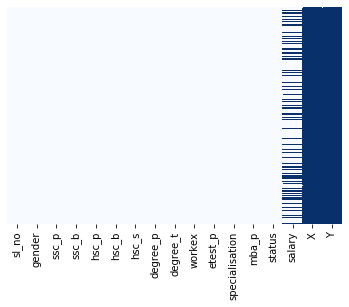

<Figure size 1152x576 with 0 Axes>

In [18]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'Blues')
plt.figure(figsize = (16,8))

In [ ]:
#Total Null Values by columns 

In [8]:
df.isnull().sum()

sl_no               0
gender              0
ssc_p               0
ssc_b               0
hsc_p               0
hsc_b               0
hsc_s               0
degree_p            0
degree_t            0
workex              0
etest_p             0
specialisation      0
mba_p               0
status              0
salary             67
X                 214
Y                 214
dtype: int64

In [23]:
# dropping unwanted columns like X and Y

In [31]:
to_drop = ['X','Y']

In [32]:
df.drop(columns = to_drop, inplace = True)

KeyError: "['X' 'Y'] not found in axis"

In [27]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [34]:
df.drop(columns = 'sl_no', inplace = True)

In [35]:
# Renaming columns

In [37]:
df.columns = ['Gender','Senior Secondary %','Senior Secondary Board','Higher Secondary %','Higher Secondary Board','Higher Secondary Stream','Graduation %','Graduation Degree','Work Experience','Etest','MBA Stream','MBA %','Status','Salary']

In [39]:
df.head(2)

,Gender,Senior Secondary %,Senior Secondary Board,Higher Secondary %,Higher Secondary Board,Higher Secondary Stream,Graduation %,Graduation Degree,Work Experience,Etest,MBA Stream,MBA %,Status,Salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [41]:
# Dealing with Null Values - As there are values in Salary column and it is a numerical column, we will take mean of other values

In [46]:
df['Salary'] = df['Salary'].replace(np.NaN,df['Salary'].mean())

In [47]:
# Changing the datatype of numerical column like Salary from float to int

In [50]:
df['Salary'] = df['Salary'].astype(int)

In [51]:
df.head()

,Gender,Senior Secondary %,Senior Secondary Board,Higher Secondary %,Higher Secondary Board,Higher Secondary Stream,Graduation %,Graduation Degree,Work Experience,Etest,MBA Stream,MBA %,Status,Salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [52]:
# Editing the data in dataframe

In [55]:
df['Gender'] = df['Gender'].replace('M','Male')

In [57]:
df['Gender'] = df['Gender'].replace('F','Female')

In [64]:
df['Graduation Degree'] = df['Graduation Degree'].replace('Sci&Tech','B.Tech')

In [67]:
df['Graduation Degree'] = df['Graduation Degree'].replace('Comm&Mgmt','B.com')

In [74]:
df['MBA Stream'] = df['MBA Stream'].replace('Mkt&HR','Marketing & HR')

In [77]:
df['MBA Stream'] = df['MBA Stream'].replace('Mkt&Fin','Marketing & Finance')

In [78]:
df.head(5)

,Gender,Senior Secondary %,Senior Secondary Board,Higher Secondary %,Higher Secondary Board,Higher Secondary Stream,Graduation %,Graduation Degree,Work Experience,MBA Stream,MBA %,Status,Salary
0,Male,67.00,Others,91.00,Others,Commerce,58.00,B.Tech,No,Marketing & HR,58.80,Placed,270000
1,Male,79.33,Central,78.33,Others,Science,77.48,B.Tech,Yes,Marketing & Finance,66.28,Placed,200000
2,Male,65.00,Central,68.00,Central,Arts,64.00,B.com,No,Marketing & Finance,57.80,Placed,250000
3,Male,56.00,Central,52.00,Central,Science,52.00,B.Tech,No,Marketing & HR,59.43,Not Placed,288655
4,Male,85.80,Central,73.60,Central,Commerce,73.30,B.com,No,Marketing & Finance,55.50,Placed,425000


In [68]:
# Removing unwanted column

In [70]:
df.drop(columns = ['Etest'], inplace = True)

# Data Visualization using Matplotlib & Seaborn

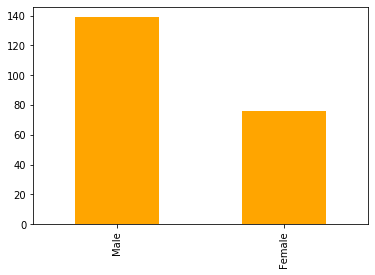

In [91]:
df['Gender'].value_counts().plot(kind = 'bar', color = 'orange')

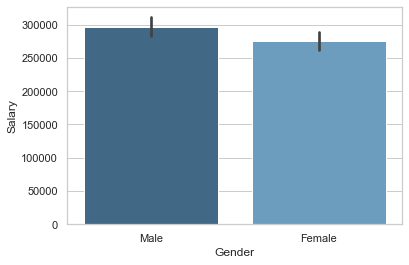

In [109]:
sns.barplot(x = 'Gender', y = 'Salary', data = df, palette = 'Blues_d')

- It can be seen using Seabborn that Male employees fetched more salary on an average than Female employees.

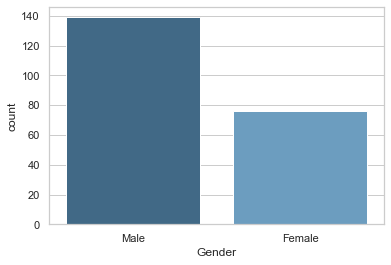

In [100]:
sns.set(style = 'whitegrid')
sns.countplot(x = 'Gender', data = df, palette = 'Blues_d')

- Male employees outnumber the female employees by almost 67 more employees.

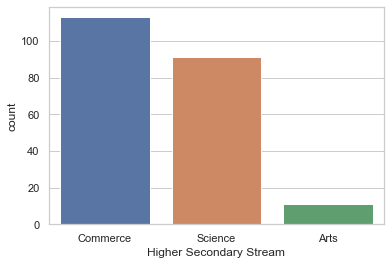

In [122]:
sns.countplot(x = 'Higher Secondary Stream',data = df)

- The most students belonged to Commerce background, followed by Science & the least belonged to Arts

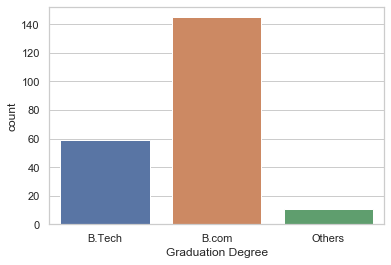

In [124]:
sns.countplot(x = 'Graduation Degree', data = df)

- 140+ students out of 227 belonged to B.com degree which was the highest , followed by B.Tech.

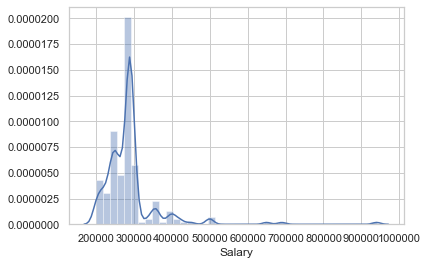

In [131]:
sns.distplot(df['Salary'], bins = 40)

- Using the distplot we can conclude that the mean salary fallsin the range of 300000.

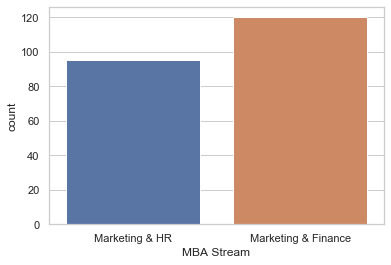

In [132]:
sns.countplot(x = df['MBA Stream'], data = df)